In [154]:
from pathlib import Path

with (Path.cwd() / "assets" /"merge unsort.txt").open("r") as f:
    data = f.read()

In [ ]:
#%%
from secrets import randbits

#from Crypto.Random.random import shuffle
import random
shuffle = random.shuffle

#from Crypto.Util.number import bytes_to_long
bytes_to_long = lambda x:int.from_bytes(x, byteorder='big')

def merge_sort(arr, cmp=lambda x, y: x < y):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid], cmp)
    right = merge_sort(arr[mid:], cmp)
    return sorted_merge(left, right, cmp)

def sorted_merge(a, b, cmp):
    res = []
    while a and b:
        res.append(a.pop(0) if cmp(a[0], b[0]) else b.pop(0))
    return res + a + b

def f(x,y):
    return randbits(1)

def truth(count = 200):
    out = []
    l = [_ for _ in range(n)]
    for i in range(count):
        shuffle(l)
        out.append((l[:]))
    return out

def fraud(count = 200):
    l = [_ for _ in range(n)]
    out = [(merge_sort(l,f)) for _ in range(count)]
    return out

n = 5

# Guess

Truth and fraud will have two different output distributions that we can differentiate

In [25]:
import math

def permutation_to_index(perm):
    n = len(perm)
    index = 0
    elements = list(range(n))
    for i in range(n):
        pos = elements.index(perm[i])
        index += pos * math.factorial(n - i - 1)
        elements.pop(pos)
    return index

def truthMOD(count = 200):
    out = []
    l = [_ for _ in range(n)]
    for i in range(count):
        shuffle(l)
        out.append(permutation_to_index(l[:]))
    return out

def fraudMOD(count = 200):
    l = [_ for _ in range(n)]
    out = [permutation_to_index(merge_sort(l,f)) for _ in range(count)]
    return out

In [32]:
truthsample = [
    truthMOD() for _ in range(500)   
]
fraudsample = [
    fraudMOD() for _ in range(500)   
]

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from secrets import randbits

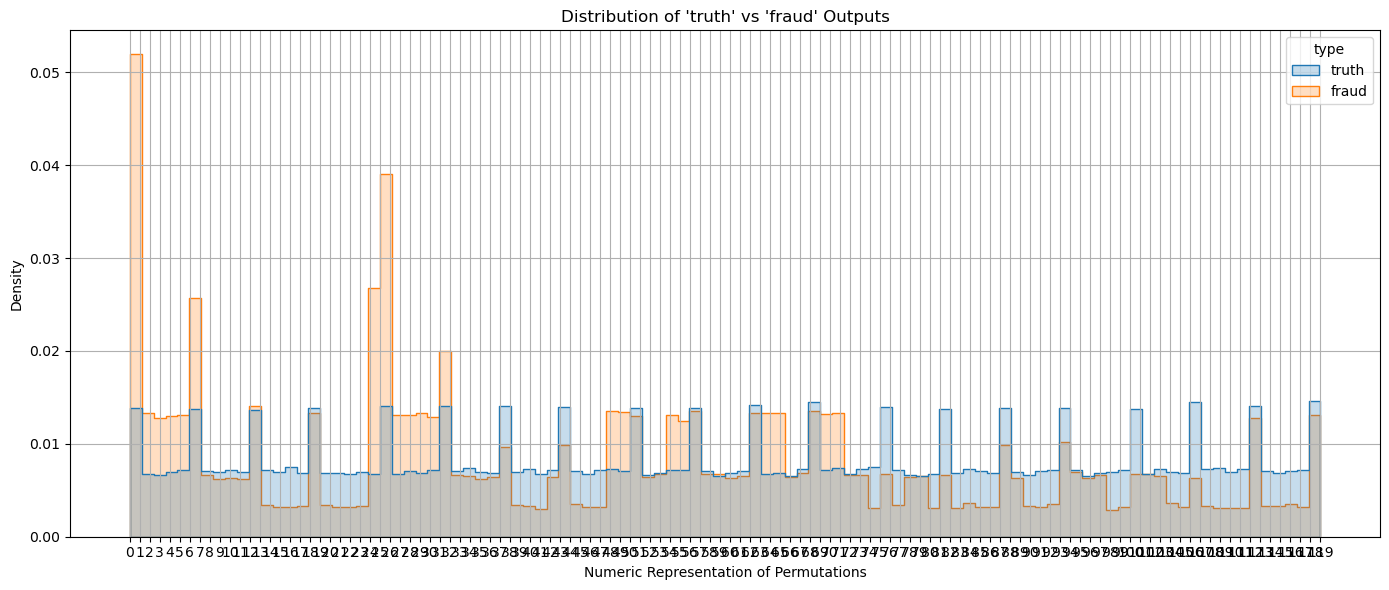

In [37]:
# Flatten the samples
truth_flat = [item for sublist in truthsample for item in sublist]
fraud_flat = [item for sublist in fraudsample for item in sublist]

# Create DataFrame
df = pd.DataFrame({
    'value': truth_flat + fraud_flat,
    'type': ['truth'] * len(truth_flat) + ['fraud'] * len(fraud_flat)
})

# Plot the distribution
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='value', hue='type', kde=False, bins=100, element='step', stat='density', common_norm=False)
plt.title("Distribution of 'truth' vs 'fraud' Outputs")
plt.xlabel("Numeric Representation of Permutations")
plt.ylabel("Density")
plt.grid(True)
plt.xticks(range(120))
plt.tight_layout()
plt.show()

In [54]:
from collections import Counter

c=Counter(fraud_flat)
c.most_common(20)

[(1, 3188),
 (24, 3183),
 (25, 3055),
 (0, 2991),
 (48, 1616),
 (49, 1600),
 (26, 1594),
 (31, 1591),
 (2, 1590),
 (71, 1590),
 (64, 1587),
 (65, 1585),
 (29, 1581),
 (70, 1570),
 (27, 1563),
 (54, 1558),
 (5, 1558),
 (28, 1557),
 (7, 1553),
 (4, 1553)]

In [55]:
max(c.values()),sum(c.values())/len(c),min(c.values())

(3188, 833.3333333333334, 344)

In [56]:
c=Counter(truth_flat)
max(c.values()),sum(c.values())/len(c),min(c.values())

(897, 833.3333333333334, 771)

# Building a predictor

<Axes: >

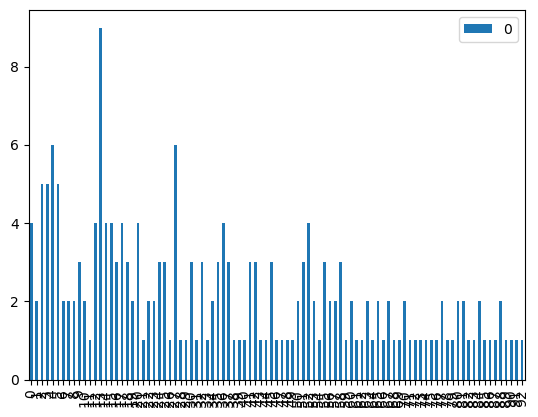

In [122]:
pd.DataFrame(Counter(fraudsample[1]).values()).plot(kind="bar")

<Axes: >

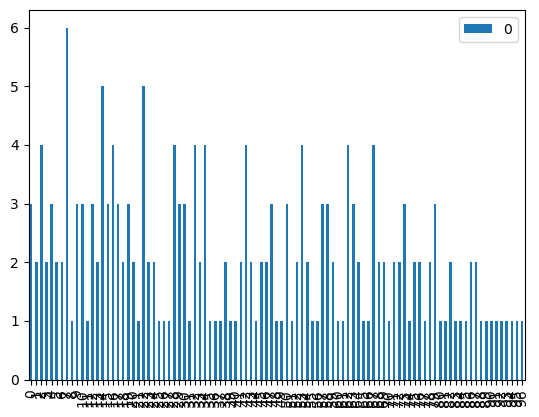

In [123]:
pd.DataFrame(Counter(truthsample[1]).values()).plot(kind="bar")

In [133]:
from scipy.stats import chisquare

def test(sample):
    # Assume `values` is a list of permutation indices (0 to 119)
    counts = pd.Series(sample).value_counts().sort_index()
    full_counts = counts.reindex(range(120), fill_value=0)
    expected = [len(truthsample[1]) / 120] * 120  # uniform expectation

    stat, p_value = chisquare(full_counts, f_exp=expected)
    return stat,p_value

In [ ]:
test(truthsample[3])

(140.79999999999998, 0.08416475803104365)

In [141]:
test(fraudsample[3])

(227.19999999999996, 9.006955217187655e-09)

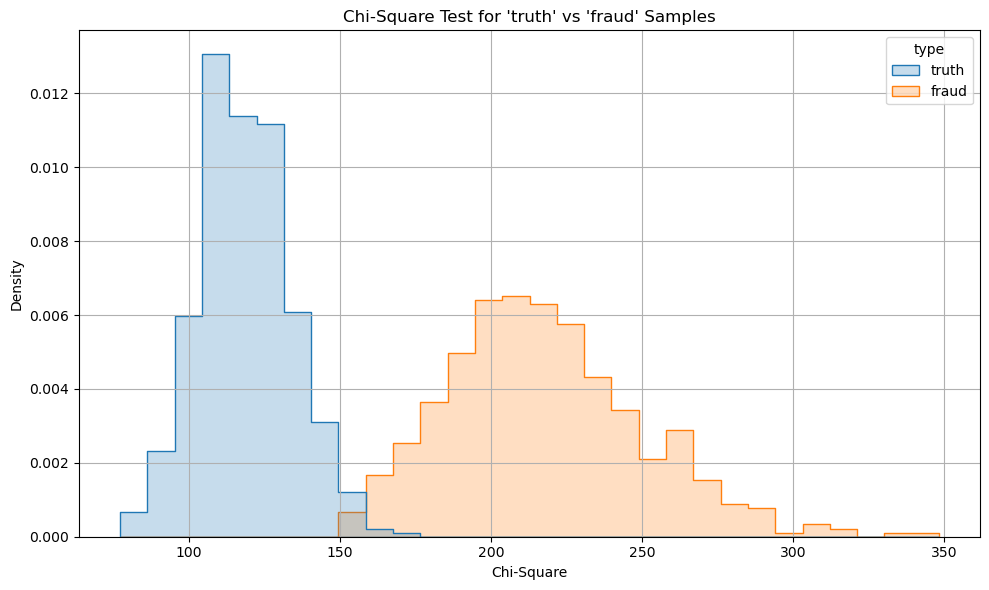

In [168]:
# Flatten the samples
truth_chi = [test(sublist)[0] for sublist in truthsample]
fraud_chi = [test(sublist)[0] for sublist in fraudsample]

df_chi = pd.DataFrame({
    'pValue': truth_chi + fraud_chi,
    'type': ['truth'] * len(truth_chi) + ['fraud'] * len(fraud_chi)
})

# Plot distribution of p-values
plt.figure(figsize=(10, 6))
sns.histplot(data=df_chi, x='pValue', hue='type', bins=30, kde=False, stat="density", element='step')
plt.title("Chi-Square Test for 'truth' vs 'fraud' Samples")
plt.xlabel("Chi-Square")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

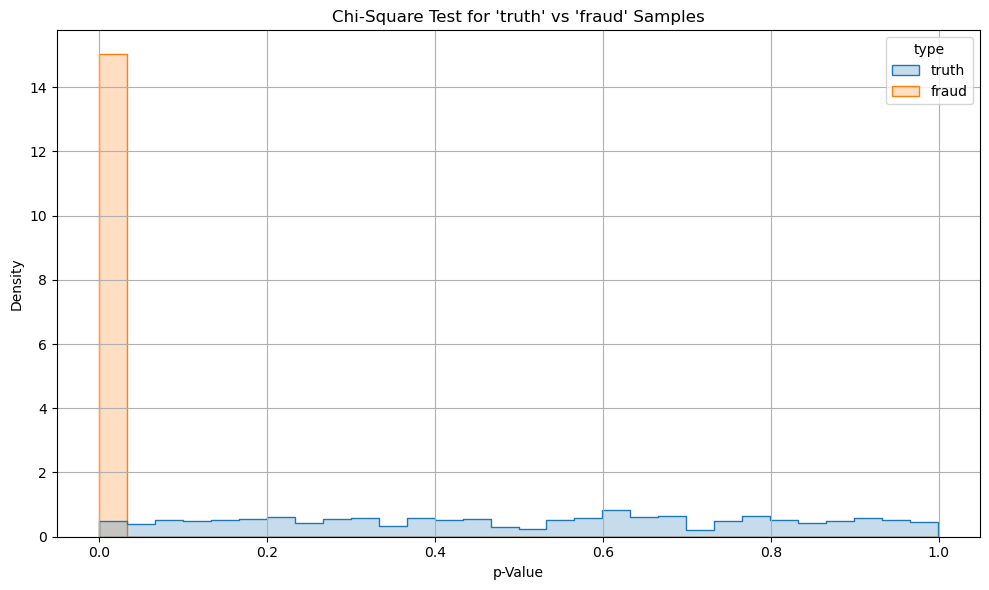

In [169]:
# Flatten the samples
truth_chi = [test(sublist)[1] for sublist in truthsample]
fraud_chi = [test(sublist)[1] for sublist in fraudsample]

df_chi = pd.DataFrame({
    'pValue': truth_chi + fraud_chi,
    'type': ['truth'] * len(truth_chi) + ['fraud'] * len(fraud_chi)
})

# Plot distribution of p-values
plt.figure(figsize=(10, 6))
sns.histplot(data=df_chi, x='pValue', hue='type', bins=30, kde=False, stat="density", element='step')
plt.title("Chi-Square Test for 'truth' vs 'fraud' Samples")
plt.xlabel("p-Value")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Let's just predict everything with a fixed test

In [158]:
output : list = []
exec(data)

In [ ]:
def long_to_bytes(val):
    if val == 0:
        return b'\x00'
    byte_length = (val.bit_length() + 7) // 8
    return val.to_bytes(byte_length, byteorder='big')


In [165]:
for threshold in [0.1,0.05,0.04,0.03,0.02,0.01,0.005,0.001]:
    res = []
    for batch in output:
        chi,p = test(map(permutation_to_index,batch))
        if p < threshold:
            res.append("1")
        else:
            res.append("0")
    print(long_to_bytes(int("".join(res),2)))

b'o\xe3t\xe6{is_n=8_pos{ibl\xe5\xdfthough?}'
b'mctf{is_n=8_possibl\xe5_though?}'
b'mctf{is_n=8_possibl\xe5_though?}'
b'mctf{is_n=8_possible_though?}'
b'mCtf{is_n=8_possible_though?}'
b'iCtf{is_n=8_possible_thgugh?}'
b'iCtf{is[n=8_possible_thgugh?}'
b"ACtd{is[n=8_possible_4h'ugh?|"


# Intended Solution

> ictf{is_n=8_possible_though?}

Mergesort will only provide a true shuffel if it's input length is a power of 2

```python
import out
from Crypto.Util.number import long_to_bytes
import itertools

def judge(output):
    counts = [[0 for i in range(5)] for _ in range(5)]
    for j in output:
        for i in range(5):
            counts[i][j[i]] += 1
    a1 = counts[0][0] + counts[0][1] + counts[0][0] + counts[1][1] + counts[0][2]
    a1 += counts[4][4] + counts[3][4] + counts[4][3] + counts[3][3] + counts[2][2]
    a1 += counts[2][3] + counts[2][4]
    if a1 < 525:
        return '0'
    if (a1 > 545):
        return '1'
    return '?'

decoded = ''
unknowns = []
for i in out.output:
    if (judge(i) == '?'):
        unknowns.append(len(decoded))
    decoded += judge(i)
if (len(unknowns) == 0):
    a = int(decoded,2)
    print(long_to_bytes(a))
    exit(1)

for combination in itertools.product(['0', '1'], repeat=len(unknowns)):
    current_decoded = list(decoded)
    
    for idx, bit in zip(unknowns, combination):
        current_decoded[idx] = bit
    
    current_decoded = ''.join(current_decoded)
    
    try:
        binary_value = int(current_decoded, 2)
        plaintext = long_to_bytes(binary_value)
        if not all(b < 128 and b > 31 for b in plaintext): 
                continue
        plaintext = plaintext.decode('utf-8')
        if (plaintext[-1] != '}' or plaintext[:5] != 'ictf{'):
                continue
        print(f"Possible Result: {plaintext}")
    except Exception as e:
        continue
```

# Just testing

In [170]:
def merge_sort(arr, cmp=lambda x, y: x < y):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid], cmp)
    right = merge_sort(arr[mid:], cmp)
    print(arr,left,right)
    return sorted_merge(left, right, cmp)

def sorted_merge(a, b, cmp):
    res = []
    while a and b:
        res.append(a.pop(0) if cmp(a[0], b[0]) else b.pop(0))
    return res + a + b

def f(x,y):
    return randbits(1)

def truth(count = 200):
    out = []
    l = [_ for _ in range(n)]
    for i in range(count):
        shuffle(l)
        out.append((l[:]))
    return out

l = [_ for _ in range(n)]
out = [(merge_sort(l,f)) for _ in range(1)]
out

[0, 1] [0] [1]
[3, 4] [3] [4]
[2, 3, 4] [2] [4, 3]
[0, 1, 2, 3, 4] [1, 0] [4, 2, 3]


[[4, 1, 0, 2, 3]]